In [1]:
from tensorflow.keras.models import load_model, Model
from tensorflow.python.keras.datasets import cifar10, mnist
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import show, return_random_image
import warnings

%matplotlib inline

W0621 22:24:42.880486 139643320104768 __init__.py:316] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [2]:
from sklearn.neighbors import NearestNeighbors

In [3]:
(x_train, _), (x_test, _) = cifar10.load_data()

autoencoder_model = load_model("autoencoder_color.h5")

In [12]:
def encode(images):
    
    encoder = load_model("encoder.h5")
    predict = encoder.predict(images)
    predict = predict.reshape(predict.shape[0],
                             predict.shape[1]*predict.shape[2]*predict.shape[3])
    
    del encoder
    return predict
    

In [23]:
def Nearest(n, query, images):
    nb = NearestNeighbors(n, metric="euclidean")
    
    features = encode(images)
    nb.fit(features)
    
    if len(query.shape) == 4 and query.shape[0] == 1:
        query = encode(query)
    elif len(query.shape) == 3:
        query = encode(query.reshape(1,query.shape[0],query.shape[1],query.shape[2]))
        
    distances, indexes = nb.kneighbors(query)
    
    del nb
    del features
    return distances[0], indexes[0]

In [95]:
def show_grid_images(imagens, indexes, figsize=(15,15)):
    
    if len(indexes)%5 == 0:
        colunas = 5
        linhas = int(len(indexes)/5)
        
    elif len(indexes)%2 == 0:
        colunas = 2
        linhas = int(len(indexes)/2)
    else:
        colunas = 3
        linhas = int(len(indexes)/3)
        
    fig, ax = plt.subplots(linhas, colunas, figsize=figsize)    
    c = 0
    for i in range(0, linhas):
        for j in range(0, colunas):
            ax[i][j].imshow(imagens[indexes[c]])   
            c += 1
    

47162


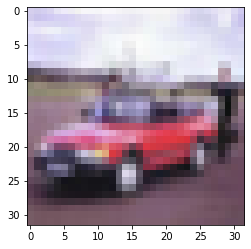

In [97]:
image, index = return_random_image(x_train)
show(image)

In [98]:
distances, indexes = Nearest(10, image, x_test)

W0621 23:05:58.664906 139643320104768 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0621 23:06:00.157476 139643320104768 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


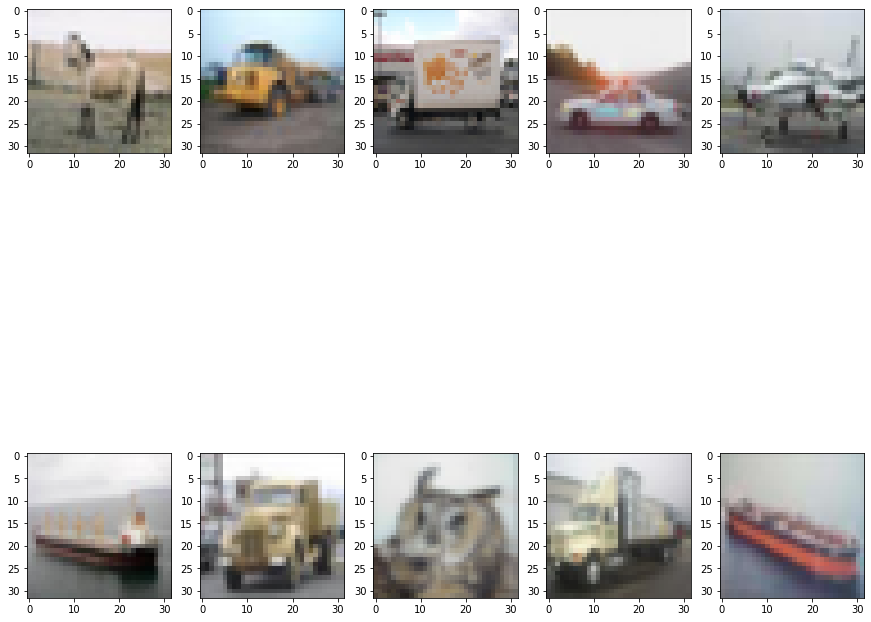

In [99]:
show_grid_images(x_test, indexes)